In [0]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UNSW_NB15_training-set.csv')

In [0]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0


In [0]:
df.groupby('attack_cat')['attack_cat'].count()

attack_cat
Analysis            677
Backdoor            583
DoS                4089
Exploits          11132
Fuzzers            6062
Generic           18871
Normal            37000
Reconnaissance     3496
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

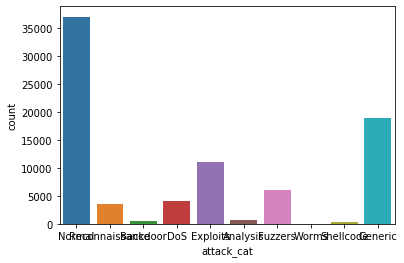

In [0]:
sns.countplot(df.attack_cat)

In [0]:
df.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [0]:
df.shape

(82332, 45)

In [0]:
uniqueOutcome =df['attack_cat'].unique()
len(uniqueOutcome)

10

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
label_encoder = preprocessing.LabelEncoder()

In [0]:
df['categorised']= label_encoder.fit_transform(df['attack_cat'])


In [0]:
df['categorised'].unique()

array([6, 7, 1, 2, 3, 0, 4, 9, 8, 5])

In [0]:
df['proto']= label_encoder.fit_transform(df['proto'])
df['service']= label_encoder.fit_transform(df['service'])
df['state']= label_encoder.fit_transform(df['state'])
data = df.drop(['attack_cat','categorised'],axis=1)

In [0]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,categorised
0,1,0.000011,117,0,4,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0,6
1,2,0.000008,117,0,4,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0,6
2,3,0.000005,117,0,4,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0,6
3,4,0.000006,117,0,4,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0,6
4,5,0.000010,117,0,4,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0,6


In [0]:
standard_data = standard_scaler.fit_transform(data)

In [0]:
  data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,117,0,4,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,117,0,4,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,3,0.000005,117,0,4,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,4,0.000006,117,0,4,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,5,0.000010,117,0,4,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,117,0,4,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,0
82328,82329,1.106101,111,0,3,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,0
82329,82330,0.000000,6,0,4,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0
82330,82331,0.000000,6,0,4,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0


In [0]:
df_data = pd.DataFrame(standard_data,columns=data.columns)
df_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,-1.732030,-0.213727,0.410563,-0.674406,0.932695,-0.124455,-0.151816,-0.043684,-0.087369,0.057181,0.71944,-0.820395,0.643913,-0.263498,-0.073531,-0.113244,-0.122179,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,0.520319,-0.475371,-0.173648,-0.04191,-0.680474,0.591021,-0.563660,-0.468312,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.640033,-0.644190,-0.10607,-1.106883
1,-1.731988,-0.213728,0.410563,-0.674406,0.932695,-0.124455,-0.151816,-0.036308,-0.087369,0.286565,0.71944,-0.820395,4.539351,-0.263498,-0.073531,-0.113244,-0.122180,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,3.556716,-0.475371,-0.173648,-0.04191,-0.680474,0.591021,-0.563660,-0.468312,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.640033,-0.644190,-0.10607,-1.106883
2,-1.731946,-0.213729,0.410563,-0.674406,0.932695,-0.124455,-0.151816,-0.040351,-0.087369,0.791209,0.71944,-0.820395,4.391459,-0.263498,-0.073531,-0.113244,-0.122180,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,1.892214,-0.475371,-0.173648,-0.04191,-0.590304,0.591021,-0.563660,-0.468312,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.640033,-0.554273,-0.10607,-1.106883
3,-1.731904,-0.213729,0.410563,-0.674406,0.932695,-0.124455,-0.151816,-0.041330,-0.087369,0.566923,0.71944,-0.820395,2.977031,-0.263498,-0.073531,-0.113244,-0.122180,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,1.489280,-0.475371,-0.173648,-0.04191,-0.590304,0.591021,-0.444868,-0.349115,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.522990,-0.554273,-0.10607,-1.106883
4,-1.731861,-0.213728,0.410563,-0.674406,0.932695,-0.124455,-0.151816,-0.034187,-0.087369,0.118350,0.71944,-0.820395,4.369219,-0.263498,-0.073531,-0.113244,-0.122179,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,4.429740,-0.475371,-0.173648,-0.04191,-0.590304,0.591021,-0.444868,-0.349115,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.522990,-0.554273,-0.10607,-1.106883


In [0]:
  df_data['proto'].unique()

array([ 0.41056274, -5.54527746,  0.08862543, -3.66730983, -1.73568598,
       -0.76987406, -4.15021579, -4.25752823, -3.50634118, -3.23806009,
       -0.17965566, -5.6525899 , -5.16968394, -4.63312176, -4.52580932,
       -1.7893422 , -1.30643624,  0.94712492, -2.00396707, -4.84774663,
       -4.09655958, -1.41374867,  0.24959409,  0.3032503 ,  1.00078114,
       -2.43321682, -2.3795606 , -2.80881034, -1.14546758, -1.89665464,
       -2.27224816, -2.32590438, -5.86721477, -3.8819347 , -4.79409041,
       -3.82827849,  0.19593787, -3.13074765, -0.71621784, -3.07709143,
       -2.91612278, -3.77462227, -2.21859194, -4.04290336, -1.03815515,
       -2.11127951, -1.95031085, -0.55524918,  0.14228165, -3.02343521,
       -5.70624612, -2.969779  , -5.22334015, -0.98449893, -3.18440387,
       -2.59418547, -0.93084271, -5.00871528,  0.8934687 , -1.25278002,
       -5.33065259, -0.07234322,  0.83981248,  0.67884383,  0.35690652,
        0.57153139, -1.84299842, -4.68677797, -4.57946554,  0.03

In [0]:
df['proto'].unique()

array([117,   6, 111,  41,  77,  95,  32,  30,  44,  49, 106,   4,  13,
        23,  25,  76,  85, 127,  72,  19,  33,  83, 114, 115, 128,  64,
        65,  57,  88,  74,  67,  66,   0,  37,  20,  38, 113,  51,  96,
        52,  55,  39,  68,  34,  90,  70,  73,  99, 112,  53,   3,  54,
        12,  91,  50,  61,  92,  16, 126,  86,  10, 108, 125, 122, 116,
       120,  75,  22,  24, 110, 103,  63,  71,   7,  47,   2,  69,  26,
        82,  31,  40,  81,  87,  94,  11,   8,  42,   9, 109, 121,  46,
        15,  60, 124,  98,  97, 129,  43,  89, 118,  28,  59,  27,  79,
         5,   1,  45, 102,  14,  56,  78, 123,  62, 130,  21,  35, 107,
       105, 119, 100, 101,  58,  84,  29,  17,  18,  93,  48,  80, 104,
        36])

In [0]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,categorised
0,1,0.000011,117,0,4,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0,6
1,2,0.000008,117,0,4,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0,6
2,3,0.000005,117,0,4,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0,6
3,4,0.000006,117,0,4,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0,6
4,5,0.000010,117,0,4,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0,6


In [0]:
X= df_data.iloc[:,:-2]
y = df['categorised']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time()
clf=RandomForestClassifier(n_estimators=10)

clf.fit(X_train,y_train)
end_time = time.time()
print(end_time-start_time)

1.189136028289795


In [0]:
start_time = time.time()
y_pred=clf.predict(X_test)

y_pred
end_time = time.time()
print(end_time-start_time)

0.03997635841369629


In [0]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8942126677597619


In [0]:
from sklearn.metrics import confusion_matrix
labels = [0,1,2,3,4]
conf_mat = confusion_matrix(y_test, y_pred,labels=[0,1,2,3,4])
print(conf_mat)

[[   9   53   27   29   14]
 [  44    3    8   55    2]
 [  11    9  314  365   25]
 [  14   44  329 1703   77]
 [  17    2   39  103 1083]]


In [0]:
from sklearn import metrics

report =  metrics.classification_report(y_test,y_pred)

# precision = report['precision'].mean()
print(type(report))
print(metrics.classification_report(y_test,y_pred))

print(metrics.cohen_kappa_score(y_test,y_pred))

<class 'str'>
              precision    recall  f1-score   support

           0       0.09      0.07      0.08       132
           1       0.03      0.03      0.03       115
           2       0.40      0.40      0.40       783
           3       0.70      0.76      0.73      2237
           4       0.87      0.85      0.86      1278
           5       0.99      0.98      0.99      3717
           6       1.00      1.00      1.00      7415
           7       0.83      0.78      0.80       705
           8       0.69      0.49      0.57        78
           9       0.00      0.00      0.00         7

    accuracy                           0.89     16467
   macro avg       0.56      0.53      0.54     16467
weighted avg       0.89      0.89      0.89     16467

0.8524629689459067


## KNN Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier


In [0]:
knn = KNeighborsClassifier(n_neighbors=30)

In [0]:
import time
start_time = time.time()
knn.fit(X_train,y_train)
end_time = time.time()
print(end_time-start_time)

7.3987648487091064


In [0]:
prediction = knn.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(confusion_matrix(y_test,prediction))

[[   0    0   23   69   37    1    1    1    0    0]
 [   0    0    6   69   34    0    2    4    0    0]
 [   0    0  301  372   50   13   14   30    3    0]
 [   0    0  329 1518  177   12  114   86    1    0]
 [   0    0   48  202  763    3  220   42    0    0]
 [   0    0    8   62   19 3600   12   16    0    0]
 [   0    0    4   15  110    4 7267   14    1    0]
 [   0    0   56  124   66    2   59  398    0    0]
 [   0    0    0    5   11    0    8   48    6    0]
 [   0    0    0    4    1    0    1    0    1    0]]


In [0]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.00      0.00      0.00       115
           2       0.39      0.38      0.39       783
           3       0.62      0.68      0.65      2237
           4       0.60      0.60      0.60      1278
           5       0.99      0.97      0.98      3717
           6       0.94      0.98      0.96      7415
           7       0.62      0.56      0.59       705
           8       0.50      0.08      0.13        78
           9       0.00      0.00      0.00         7

    accuracy                           0.84     16467
   macro avg       0.47      0.43      0.43     16467
weighted avg       0.83      0.84      0.83     16467



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
print("Accuracy:",metrics.accuracy_score(y_test,prediction))

Accuracy: 0.8412582741240056


## Support Vector Machines


In [0]:
from sklearn.svm import SVC

In [0]:
model = SVC()

In [0]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
predictions = model.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.00      0.00      0.00       115
           2       0.44      0.53      0.48       783
           3       0.70      0.68      0.69      2237
           4       0.64      0.73      0.68      1278
           5       1.00      0.97      0.98      3717
           6       0.95      0.98      0.96      7415
           7       0.61      0.53      0.57       705
           8       0.00      0.00      0.00        78
           9       0.00      0.00      0.00         7

    accuracy                           0.86     16467
   macro avg       0.43      0.44      0.44     16467
weighted avg       0.84      0.86      0.85     16467

[[   0    0   29   39   59    0    1    4    0    0]
 [   0    0    5   46   55    0    4    5    0    0]
 [   0    0  418  235   70    5   16   39    0    0]
 [   0    0  375 1518  181    1   93   69    0    0]
 [   0    0   48  108  935   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
print("Accuracy:",metrics.accuracy_score(y_test,predictions))

Accuracy: 0.8561365154551527
